# Data Preprocessing for Modeling 

In [1]:
# Standardizing all numeric variables 
from sklearn.preprocessing import StandardScaler
from pyspark.sql.types import StringType 
from pyspark.sql.functions import col 
import numpy as np
import pandas as pd 

from numpy import random 
random.seed(seed=12345)

In [2]:
import pandas as pd
from glob import glob
np.random.seed(12345)

# Path to the CSV files
path = '/GWSB/home/g35026169/Desktop/Vectorized_Stacked/stacked_*.csv'

# Use glob to match the pattern and get a list of file names
files = glob(path)

# Read each CSV file and store them in a list
dfs = [pd.read_csv(file) for file in files]

# Concatenate all DataFrames in the list into one
df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_2966836/4195686458.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in files]
/tmp/ipykernel_2966836/4195686458.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in files]
/tmp/ipykernel_2966836/4195686458.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in files]
/tmp/ipykernel_2966836/4195686458.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in files]
/tmp/ipykernel_2966836/4195686458.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in files]
/tmp/ipykernel_2966836/4195686458.py:12: DtypeWarning: Columns (7

In [3]:
np.random.seed(12345)
# Drop specified columns
df = df.drop(columns=['LOAN SEQUENCE NUMBER','MONTHLY REPORTING PERIOD', 'CURRENT ACTUAL UPB', 'OrigQuarter'])
df.head()

,Group,DEFAULT,Horizon,Source,CURRENT LOAN DELINQUENCY STATUS,LOAN AGE,CURRENT INTEREST RATE,ESTIMATED LOAN TO VALUE (ELTV),CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,...,ORIGINAL INTEREST RATE,PROPERTY TYPE,LOAN PURPOSE,SELLER NAME,OrigYear,OrigDate,index_sa,UNRATE,inflation,% Change in UPB
0,0,0,0,orig,0,0,6.5,Undefined,800,N,...,6.5,MH,P,Other sellers,2007,2007Q1,223.95,4.5,2.4,0.0
1,1,0,0,orig,0,1,6.5,0.996,800,N,...,6.5,MH,P,Other sellers,2007,2007Q1,224.85,4.4,2.8,0.0
2,1,0,1,Duplicated,0,0,6.5,Undefined,800,N,...,6.5,MH,P,Other sellers,2007,2007Q1,223.95,4.5,2.4,0.0
3,2,0,0,orig,0,2,6.5,0.9959,800,N,...,6.5,MH,P,Other sellers,2007,2007Q1,224.88,4.5,2.6,0.0
4,2,0,1,Duplicated,0,1,6.5,0.996,800,N,...,6.5,MH,P,Other sellers,2007,2007Q1,224.85,4.4,2.8,0.0


In [4]:
np.random.seed(12345)

full_timeseries = df.sort_values(by='OrigDate', ascending=True)

In [5]:
np.random.seed(12345)

full_timeseries = full_timeseries.dropna(subset=["% Change in UPB"])

In [6]:
np.random.seed(12345)

# Convert Decimal to Percentage in the % Change in UPB Column
full_timeseries['% Change in UPB'] = full_timeseries['% Change in UPB'] * 100
full_timeseries.tail()

,Group,DEFAULT,Horizon,Source,CURRENT LOAN DELINQUENCY STATUS,LOAN AGE,CURRENT INTEREST RATE,ESTIMATED LOAN TO VALUE (ELTV),CREDIT SCORE,FIRST TIME HOMEBUYER FLAG,...,ORIGINAL INTEREST RATE,PROPERTY TYPE,LOAN PURPOSE,SELLER NAME,OrigYear,OrigDate,index_sa,UNRATE,inflation,% Change in UPB
57395187,4656,0,0,orig,0,0,6.375,Undefined,771,N,...,6.375,SF,P,"GUARANTEED RATE, INC.",2023,2023Q2,403.44,3.7,4.0,-0.18
57395186,4655,0,4,Duplicated,0,0,6.375,Undefined,762,Y,...,6.375,SF,P,"GUARANTEED RATE, INC.",2023,2023Q2,403.44,3.7,4.0,0.00
57395185,4655,0,3,Duplicated,0,1,6.375,0.9947,762,Y,...,6.375,SF,P,"GUARANTEED RATE, INC.",2023,2023Q2,405.61,3.6,3.0,0.00
57395193,4659,0,0,orig,0,3,6.375,0.9756,771,N,...,6.375,SF,P,"GUARANTEED RATE, INC.",2023,2023Q2,412.04,3.8,3.7,-0.36
57393393,4055,0,2,Duplicated,0,2,5.875,0.9535,766,Y,...,5.875,CO,P,"UNITED WHOLESALE MORTGAGE, LLC",2023,2023Q2,409.00,3.5,3.2,-3.33


In [7]:
np.random.seed(12345)

total_rows = len(full_timeseries) 
print(f"Total number of rows in the DataFrame: {total_rows}")

Total number of rows in the DataFrame: 97262009


In [8]:
np.random.seed(12345)

# Reset the index 
full_timeseries.reset_index(drop=True, inplace=True)

In [9]:
np.random.seed(12345)

# Now that the DataFrame is sorted and the index has been reset, fetch indices for 2022 and 2023
end_test_idx = total_rows

print(f"End of test index (inclusive): {end_test_idx}")

End of test index (inclusive): 97262009


In [10]:
np.random.seed(12345)

# Calculate the index that represents 80% of the data up to the end of 2023
split_index = int(end_test_idx * 0.8)

# Print the calculated split index
print(f"Training data ends at index: {split_index}")
print(f"Testing data starts at index: {split_index + 1} and ends at index: {end_test_idx}")

Training data ends at index: 77809607
Testing data starts at index: 77809608 and ends at index: 97262009


In [11]:
np.random.seed(12345)

full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'] = pd.to_numeric(full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'], errors='coerce').fillna(-1)

In [12]:
np.random.seed(12345)

contains_undefined = full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'].isin(['undefined']).any()

print("Is 'undefined' present in the ELTV column?", contains_undefined)

Is 'undefined' present in the ELTV column? False


In [13]:
np.random.seed(12345)

full_timeseries['CURRENT LOAN DELINQUENCY STATUS'] = full_timeseries['CURRENT LOAN DELINQUENCY STATUS'].astype(str)
full_timeseries['CURRENT INTEREST RATE'] = full_timeseries['CURRENT INTEREST RATE'].astype(np.float32)
full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'] = full_timeseries['ESTIMATED LOAN TO VALUE (ELTV)'].astype(np.float32)
full_timeseries['ORIGINAL INTEREST RATE'] = full_timeseries['ORIGINAL INTEREST RATE'].astype(np.float32)
full_timeseries['index_sa'] = full_timeseries['index_sa'].astype(np.float32)
full_timeseries['UNRATE'] = full_timeseries['UNRATE'].astype(np.float32)
full_timeseries['inflation'] = full_timeseries['inflation'].astype(np.float32)
full_timeseries['% Change in UPB'] = full_timeseries['% Change in UPB'].astype(np.float32)
full_timeseries['OrigYear'] = full_timeseries['OrigYear'].astype(str)

full_timeseries.drop(columns=['CURRENT LOAN DELINQUENCY STATUS'], inplace=True)
full_timeseries.drop(columns=['LOAN AGE'], inplace=True)

In [14]:
np.random.seed(12345)

column_types = full_timeseries.dtypes
print(column_types)

Group                               int64
DEFAULT                             int64
Horizon                             int64
Source                             object
CURRENT INTEREST RATE             float32
ESTIMATED LOAN TO VALUE (ELTV)    float32
CREDIT SCORE                        int64
FIRST TIME HOMEBUYER FLAG          object
OCCUPANCY STATUS                   object
ORIGINAL INTEREST RATE            float32
PROPERTY TYPE                      object
LOAN PURPOSE                       object
SELLER NAME                        object
OrigYear                           object
OrigDate                           object
index_sa                          float32
UNRATE                            float32
inflation                         float32
% Change in UPB                   float32
dtype: object


In [87]:
np.random.seed(12345)

import numpy as np
from sklearn.utils.class_weight import compute_class_weight

train = full_timeseries[:split_index]
y = train['DEFAULT']
arr = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)

value1, value2 = arr
print(f"Testing data starts at index: {value1} and ends at index: {value2}")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Testing data starts at index: 0.5577932977782337 and ends at index: 4.825761110904377


In [16]:
np.random.seed(12345)

full_timeseries['Weight'] = full_timeseries['DEFAULT'].apply(lambda x: value1 if x == 0 else value2)
full_timeseries['Weight'] = full_timeseries['Weight'].astype(np.float32)

In [17]:
full_timeseries.drop(columns=['Source'], inplace=True)
full_timeseries.drop(columns=['Group'], inplace=True)
full_timeseries['Horizon'] = full_timeseries['Horizon'].astype(str)

# PiML - Stacked Dataset (after vectorization)

In [18]:
from piml import Experiment
np.random.seed(12345)

exp = Experiment()
exp.data_loader(data = full_timeseries, silent=True)

In [19]:
np.random.seed(12345)

exp.data_summary(feature_exclude=[], feature_type={"Horizon":"categorical", "Weight":"numerical"})

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,name,n_missing,mean,std,min,q1,median,q3,max
0,CURRENT INTEREST RATE,0,5.2481,1.2918,1.9990,4.2500,5.1250,6.1250,46.2500
1,ESTIMATED LOAN TO VALUE (ELTV),0,0.8083,0.2925,-1.0000,0.7265,0.8582,0.9636,2.3467
2,CREDIT SCORE,0,731.4670,406.8908,300.0000,672.0000,717.0000,763.0000,9999.0000
3,ORIGINAL INTEREST RATE,0,5.3721,1.2444,1.9990,4.3750,5.3750,6.2500,10.7500
4,OrigYear,0,2009.1868,5.6175,2000.0000,2004.0000,2009.0000,2014.0000,2023.0000
5,index_sa,0,233.0332,55.8029,136.8600,191.3200,218.0800,259.1200,414.9800
6,UNRATE,0,5.9679,2.1044,3.4000,4.4000,5.3000,7.5000,14.8000
7,inflation,0,2.3605,1.8272,-2.1000,1.4000,2.0000,2.9000,9.1000
8,% Change in UPB,0,-6.7407,9.0409,-100.0000,-9.2100,-4.3700,-1.6400,138.3000
9,Weight,0,1.0020,1.3032,0.5578,0.5578,0.5578,0.5578,4.8258


Data Shape:(97262009, 18)


In [20]:
np.random.seed(12345)

custom_train_idx = np.arange(0, split_index)
custom_test_idx = np.arange(split_index+1, end_test_idx)
exp.data_prepare(target='DEFAULT', task_type='classification', sample_weight="Weight",
                train_idx=custom_train_idx, test_idx=custom_test_idx, random_state = 12345)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Config,Value
0,Excluded columns,[]
1,Target variable,DEFAULT
2,Sample weight,Weight
3,Task type,classification
4,Split method,manual
5,Test ratio,0.2
6,Random state,12345


In [85]:
np.random.seed(12345) 
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [86]:
np.random.seed(12345) 
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [41]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Confusion Matrix:
[[7477047.08607966 2224061.41208112]
 [4764990.50592661 5178297.65978575]]


0.5970717135959045

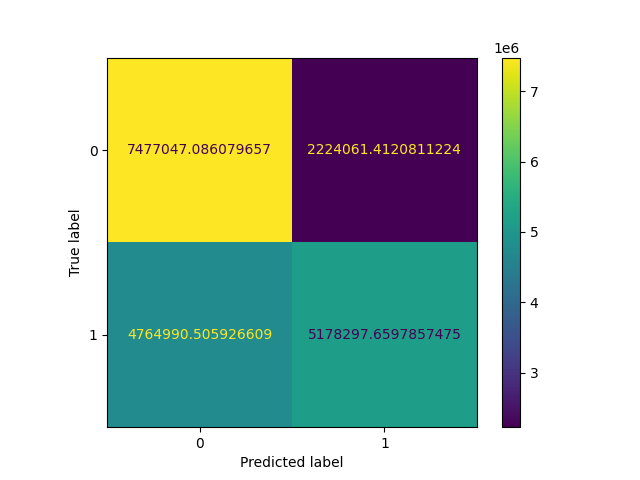

In [69]:
# Manually computing accuracy metrics due to PiML model diagnose error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_recall_curve
np.random.seed(12345) 
np.set_printoptions(suppress=False)

model = exp.get_model('XGB2_v2')
test_data1 = full_timeseries.loc[split_index + 1:end_test_idx]
test_data1.drop(columns=['Weight','DEFAULT'], inplace=True)
pred_value = model.predict(test_data1) 

test_data = full_timeseries.loc[split_index + 1:end_test_idx]
true_value = test_data['DEFAULT']
conf_matrix = confusion_matrix(true_value, pred_value, sample_weight = test_data["Weight"])

print("Confusion Matrix:")
print(conf_matrix)

classes = test_data['DEFAULT'].unique()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=classes)
disp.plot(values_format='')


f1_score(true_value, pred_value,sample_weight = test_data["Weight"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

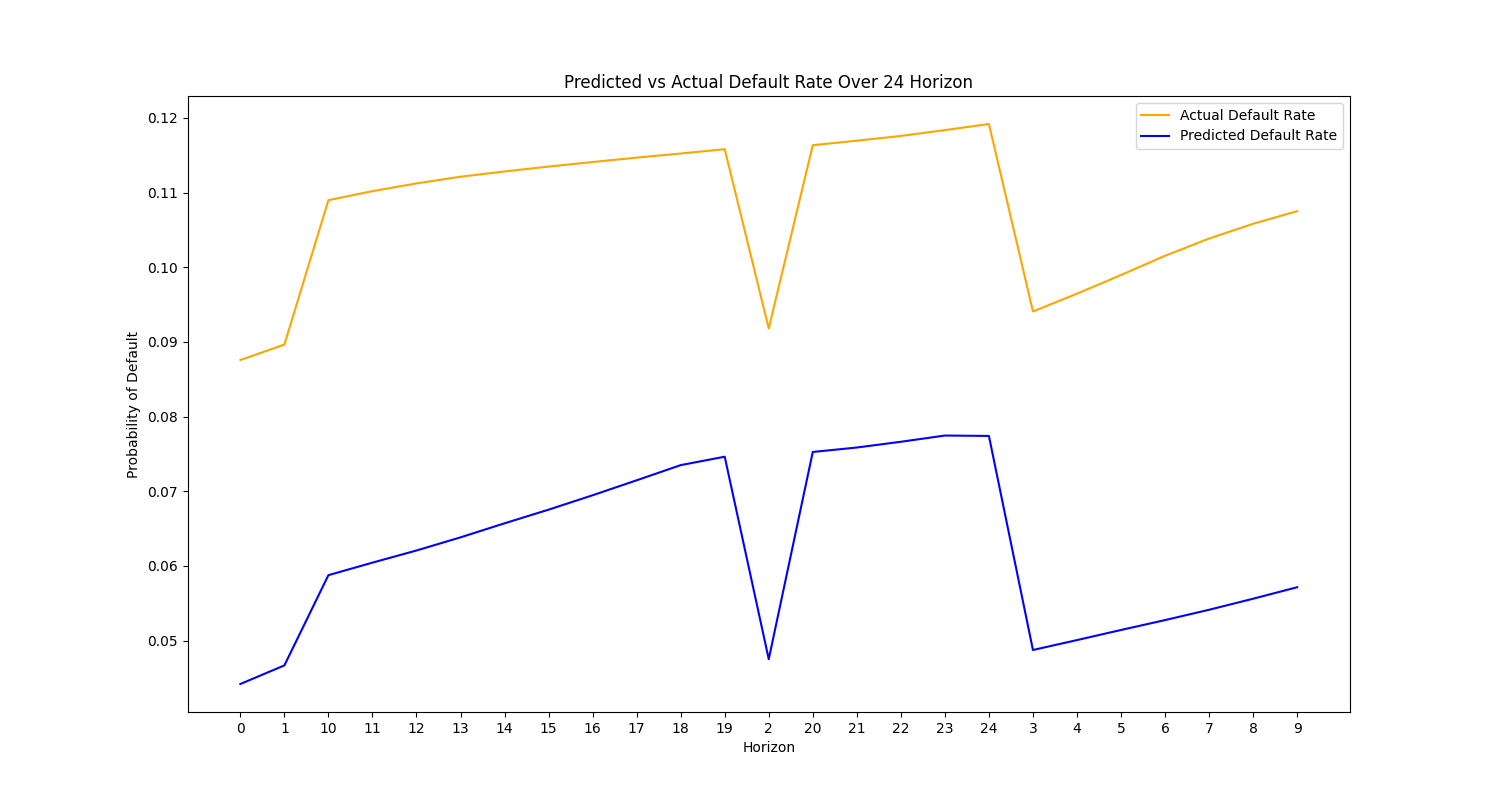

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# To adjust oversampling
pred_value2 = model.predict(test_data1)-0.2

# Aggregate the actual default rates by Horizon
actual_by_horizon = test_data.groupby('Horizon')['DEFAULT'].mean()

# Aggregate the predicted default rates by Horizon
pred_by_horizon = pd.Series(pred_value2, index=test_data.index).groupby(test_data['Horizon']).mean()

# Plot the actual vs predicted default rates over time
plt.figure(figsize=(15, 8))
plt.plot(actual_by_horizon.index, actual_by_horizon.values, label='Actual Default Rate', color='orange')
plt.plot(pred_by_horizon.index, pred_by_horizon.values, label='Predicted Default Rate', color='blue')

plt.title('Predicted vs Actual Default Rate Over 24 Horizon')
plt.xlabel('Horizon')
plt.ylabel('Probability of Default')
plt.legend()
plt.show()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

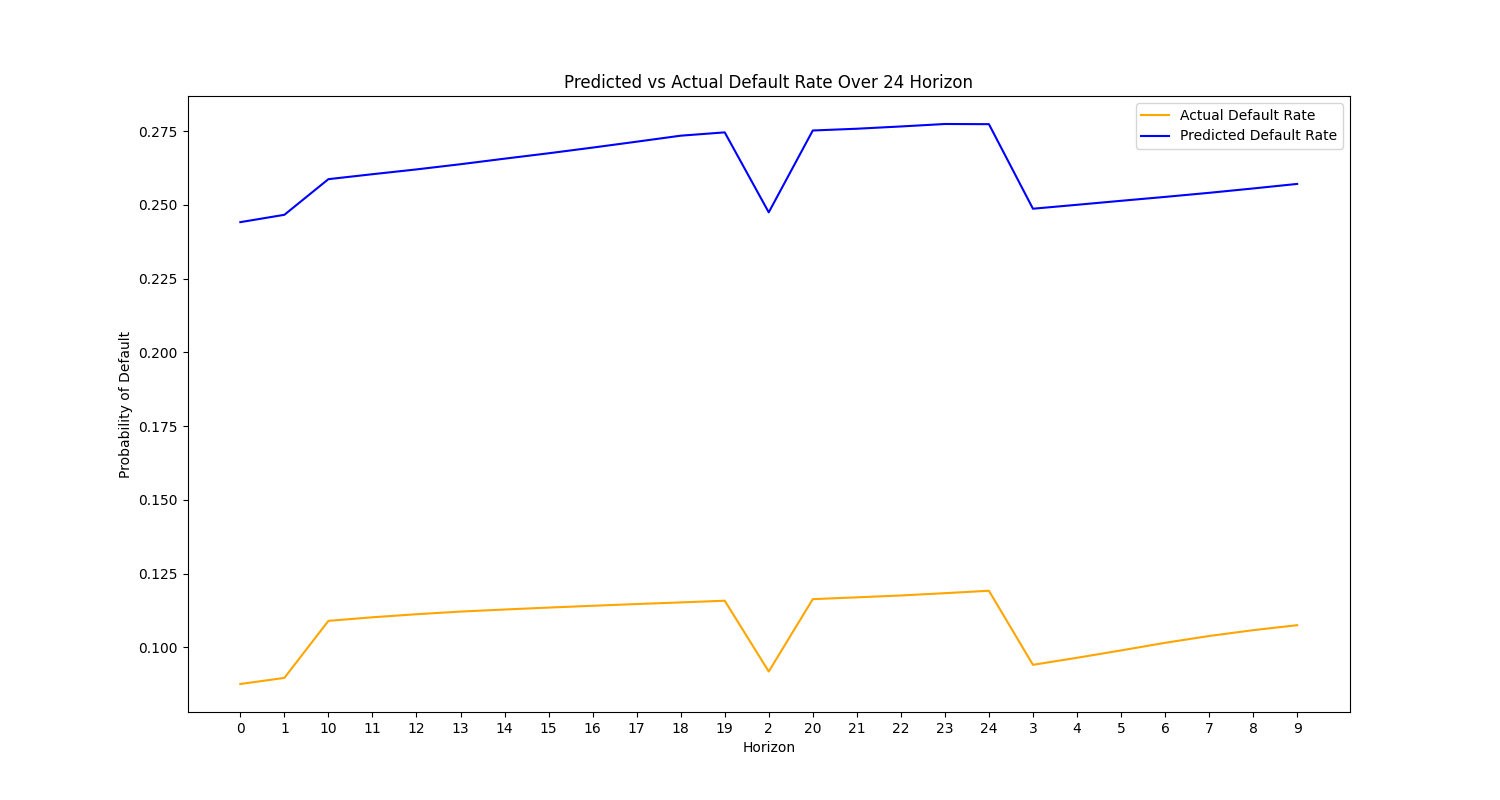

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate the actual default rates by Horizon
actual_by_horizon = test_data.groupby('Horizon')['DEFAULT'].mean()

# Aggregate the predicted default rates by Horizon
pred_by_horizon = pd.Series(pred_value, index=test_data.index).groupby(test_data['Horizon']).mean()

# Plot the actual vs predicted default rates over time
plt.figure(figsize=(15, 8))
plt.plot(actual_by_horizon.index, actual_by_horizon.values, label='Actual Default Rate', color='orange')
plt.plot(pred_by_horizon.index, pred_by_horizon.values, label='Predicted Default Rate', color='blue')

plt.title('Predicted vs Actual Default Rate Over 24 Horizon')
plt.xlabel('Horizon')
plt.ylabel('Probability of Default')
plt.legend()
plt.show()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

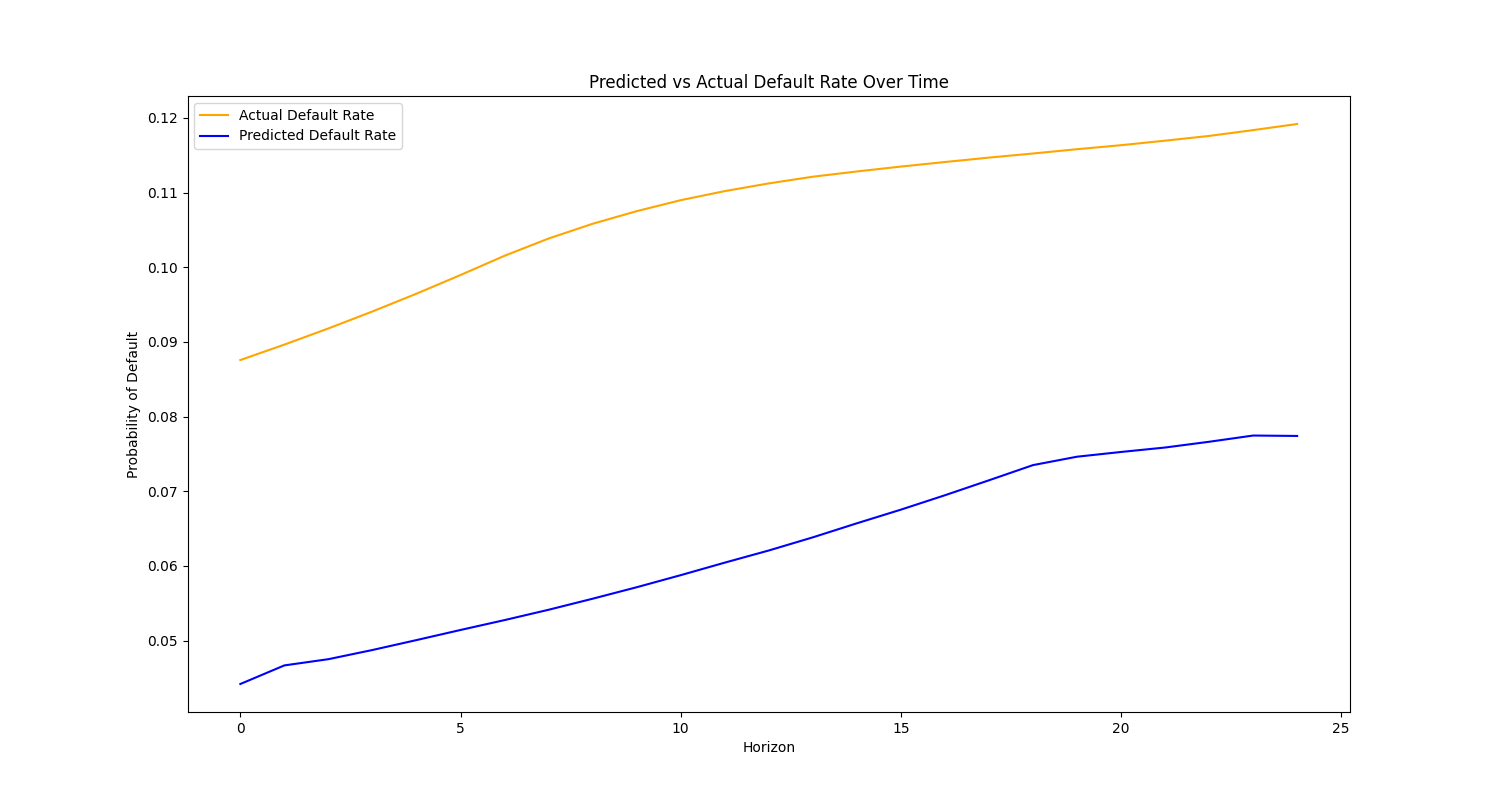

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# To adjust oversampling
pred_value2 = model.predict(test_data1) - 0.2

test_data['Horizon'] = pd.to_numeric(test_data['Horizon'], errors='coerce')

# Aggregate the actual default rates by Horizon
actual_by_horizon = test_data.groupby('Horizon')['DEFAULT'].mean().sort_index()

# Aggregate the predicted default rates by Horizon
pred_by_horizon = pd.Series(pred_value2, index=test_data.index).groupby(test_data['Horizon']).mean().sort_index()

# Plot the actual vs predicted default rates over time
plt.figure(figsize=(15, 8))
plt.plot(actual_by_horizon.index, actual_by_horizon.values, label='Actual Default Rate', color='orange')
plt.plot(pred_by_horizon.index, pred_by_horizon.values, label='Predicted Default Rate', color='blue')

plt.title('Predicted vs Actual Default Rate Over Time')
plt.xlabel('Horizon')
plt.ylabel('Probability of Default')
plt.legend()
plt.show()